# Import libraries 

In [42]:
import pandas as pd
import numpy as np

from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
# conda install -c conda-forge mlxtend

In [43]:
!pip install mlxtend

In [44]:
data=pd.read_csv("my_movies.csv")
data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


### Here "v4" and "v5" are drop out because so much NaN values are there

In [45]:
data.drop(data[["V4","V5"]],axis=1)

,V1,V2,V3,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,1,1,0,0,0,0,0,1,0,1


In [46]:
#CREATE THE DUMMIES VARIABLE TO THE V1,V2,V3

In [47]:
df=pd.get_dummies(data[["V1","V2","V3"]])


In [48]:
data=pd.concat([data,df],axis=1)
data.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,...,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,...,0,0,0,0,0,1,1,0,0,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [49]:
#DROP OUT V1,V2,V3,V4
data=data.drop(data[["V1","V2","V3","V4","V5"]],axis=1)

In [50]:
data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense
0,1,0,1,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,0,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9,1,1,0,0,0,0,0,1,0,1,...,1,0,1,0,0,0,0,1,0,0


# Apriori Algorithm 

In [96]:
#here we take min_support=0.3

frequent_itemsets = apriori(data, min_support=0.3, use_colnames=True,)
frequent_itemsets.head()


C:\Users\shiwam\Anaconda_shi\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)


In [60]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.4)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


<StemContainer object of 3 artists>

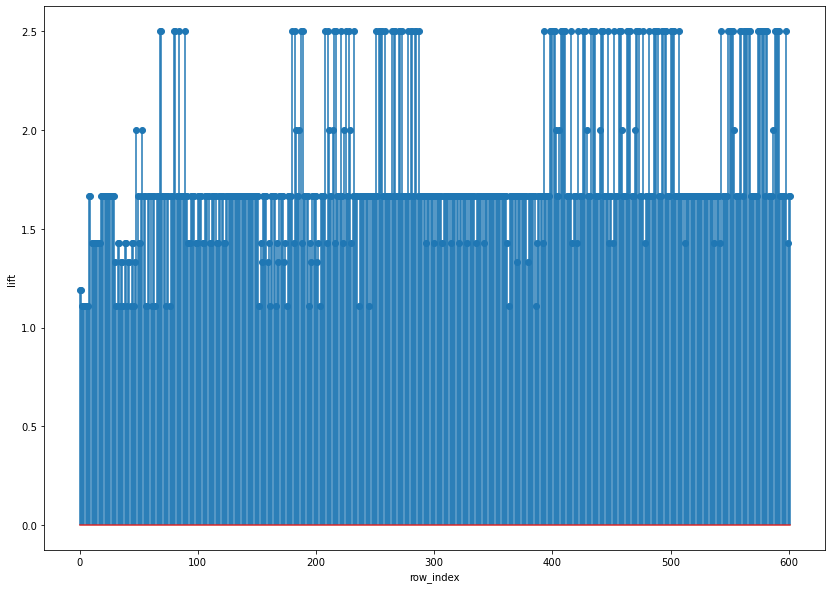

In [61]:
 #### plotting the lift values 

plt.figure(figsize=(14,10))
plt.ylabel("lift")
plt.xlabel("row_index")
plt.stem(np.arange(len(rules)),np.round(rules["lift"],4))


<StemContainer object of 3 artists>

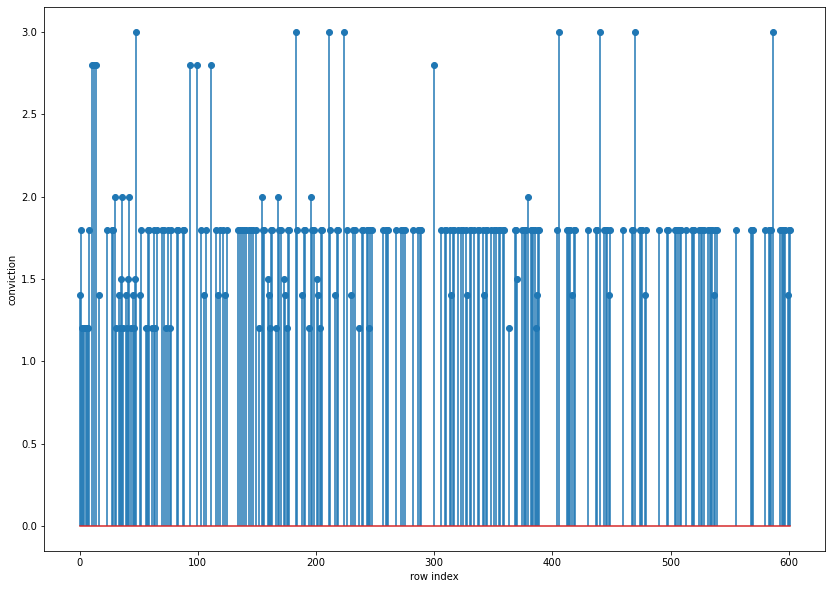

In [62]:
#### Plotting the conviction values

plt.figure(figsize=(14,10))
plt.xlabel("row index")
plt.ylabel("conviction")
plt.stem(np.arange(len(rules)),np.round(rules["conviction"],4))


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
*A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]


In [63]:
rules.sort_values('lift',ascending = False)[0:20]#Here the rules dataset sorted desceding order according to the lift values



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
447,(V3_Sixth Sense),"(V2_Patriot, Sixth Sense, Patriot, Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
543,"(V2_Patriot, Sixth Sense, Gladiator, Patriot, ...",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
456,"(V2_Patriot, Sixth Sense, Gladiator)","(V3_Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.0,2.5,0.24,inf
89,(V3_Sixth Sense),"(V2_Patriot, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
225,"(Gladiator, V3_Sixth Sense)","(V2_Patriot, Sixth Sense)",0.4,0.4,0.4,1.0,2.5,0.24,inf
452,"(V2_Patriot, Sixth Sense, V1_Gladiator, Gladia...",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
264,"(V2_Patriot, Sixth Sense, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
84,"(V2_Patriot, Sixth Sense)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
221,"(Gladiator, Sixth Sense, V2_Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.0,2.5,0.24,inf
266,"(V2_Patriot, V3_Sixth Sense)","(Sixth Sense, Patriot)",0.4,0.4,0.4,1.0,2.5,0.24,inf


In [64]:
## lift>1 means the items are dependent more. and high conviction value means that the consequent is highly depending on the anteccedent

rules[rules.lift>1]#here the consequent items are more dependent to the antecedent items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(Sixth Sense),"(V2_Patriot, V3_Sixth Sense, Gladiator, Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(V3_Sixth Sense),"(V2_Patriot, Sixth Sense, Gladiator, Patriot, ...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
599,(Gladiator),"(V2_Patriot, Sixth Sense, V3_Sixth Sense, Patr...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
600,(Patriot),"(V2_Patriot, Sixth Sense, V3_Sixth Sense, Glad...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


### here we take min_support=0.6 and min_threshold=0.9


C:\Users\shiwam\Anaconda_shi\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<StemContainer object of 3 artists>

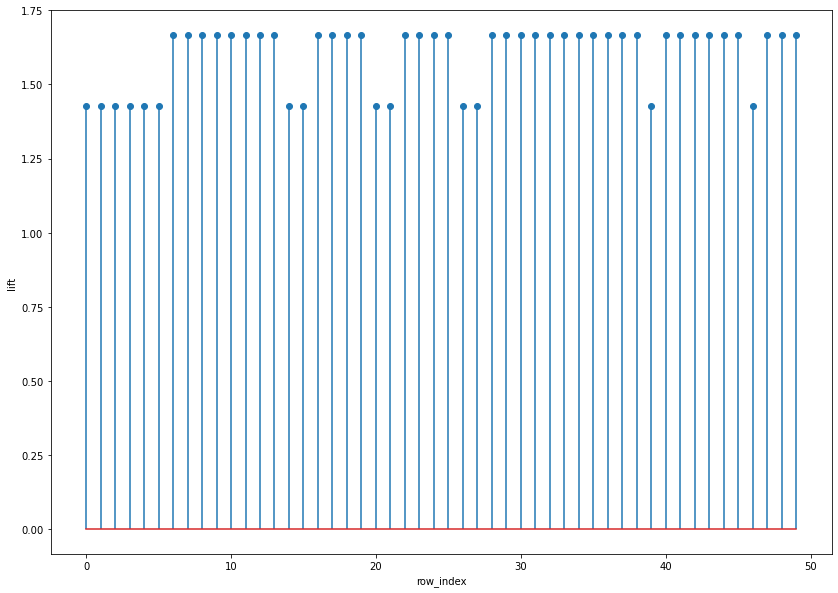

In [95]:
frequent_itemsets1 = apriori(data, min_support=0.6, use_colnames=True,)
frequent_itemsets1.head()


rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.9)

#### plotting the lift values 

plt.figure(figsize=(14,10))
plt.ylabel("lift")
plt.xlabel("row_index")
plt.stem(np.arange(len(rules1)),np.round(rules1["lift"],4))



In [81]:
rules1


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


<StemContainer object of 3 artists>

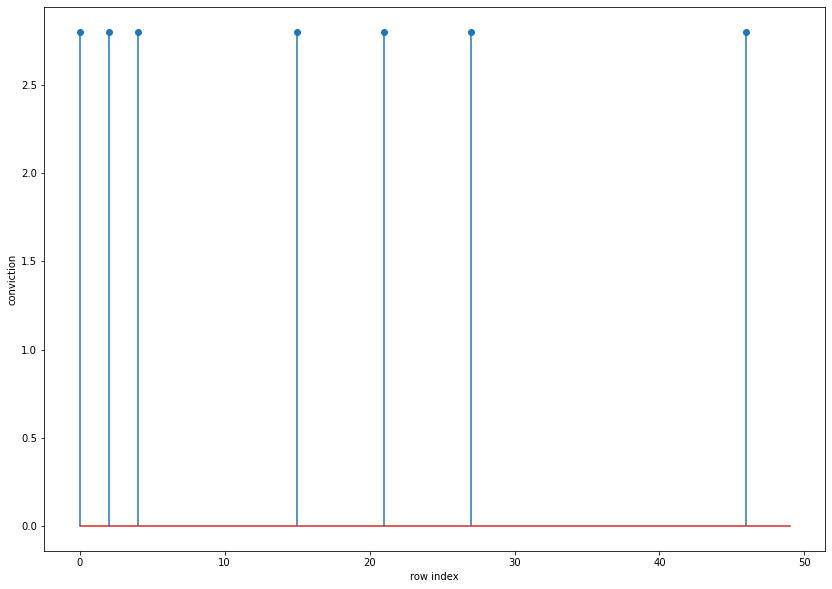

In [82]:
#### Plotting the conviction values

plt.figure(figsize=(14,10))
plt.xlabel("row index")
plt.ylabel("conviction")
plt.stem(np.arange(len(rules1)),np.round(rules1["conviction"],4))




In [83]:
#####  An leverage value of 0 indicates independence. Range will be [-1 1]
#A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

rules1.sort_values('lift',ascending = False)[0:20]#Here the rules dataset sorted desceding order according to the lift values

## lift>1 means the items are dependent more. and high conviction value means that the consequent is highly depending on the anteccedent

rules1[rules1.lift>1]#here the consequent items are more dependent to the antecedent items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


### here we take min_support=0.4,min_threshold=0.3


C:\Users\shiwam\Anaconda_shi\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


<StemContainer object of 3 artists>

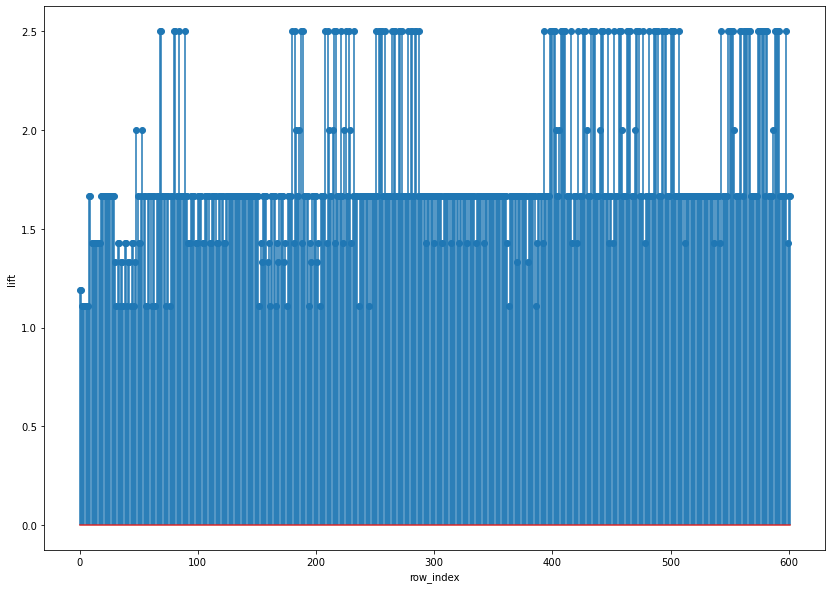

In [88]:

frequent_itemsets2 = apriori(data, min_support=0.4, use_colnames=True,)
frequent_itemsets2.head()

rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.3)

   #### plotting the lift values 

plt.figure(figsize=(14,10))
plt.ylabel("lift")
plt.xlabel("row_index")
plt.stem(np.arange(len(rules2)),np.round(rules2["lift"],4))




In [89]:
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(Sixth Sense),"(V2_Patriot, V3_Sixth Sense, Gladiator, Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(V3_Sixth Sense),"(V2_Patriot, Sixth Sense, Gladiator, Patriot, ...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
599,(Gladiator),"(V2_Patriot, Sixth Sense, V3_Sixth Sense, Patr...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
600,(Patriot),"(V2_Patriot, Sixth Sense, V3_Sixth Sense, Glad...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


<StemContainer object of 3 artists>

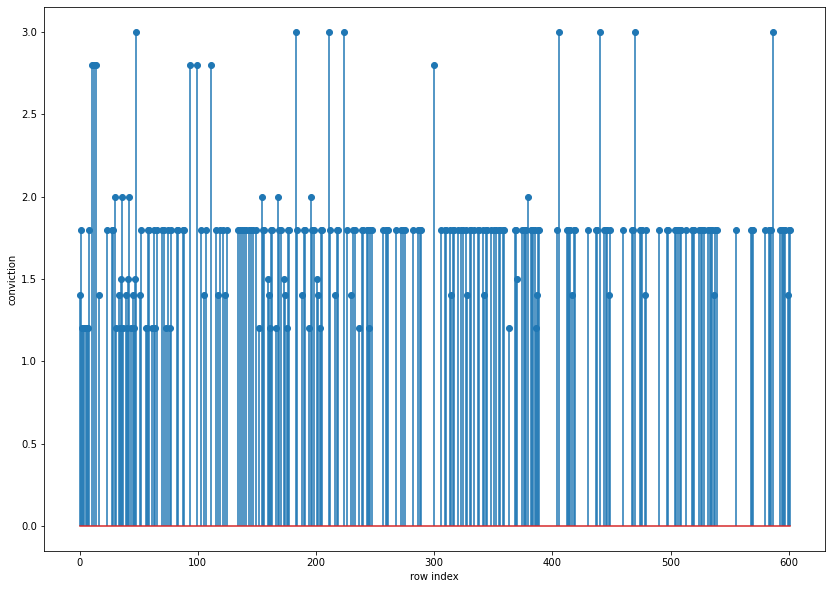

In [90]:
#### Plotting the conviction values

plt.figure(figsize=(14,10))
plt.xlabel("row index")
plt.ylabel("conviction")
plt.stem(np.arange(len(rules2)),np.round(rules2["conviction"],4))




In [91]:
#####  An leverage value of 0 indicates independence. Range will be [-1 1]
#A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

rules2.sort_values('lift',ascending = False)[0:20]#Here the rules dataset sorted desceding order according to the lift values

## lift>1 means the items are dependent more. and high conviction value means that the consequent is highly depending on the anteccedent

rules2[rules2.lift>1]#here the consequent items are more dependent to the antecedent items

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(Sixth Sense),"(V2_Patriot, V3_Sixth Sense, Gladiator, Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(V3_Sixth Sense),"(V2_Patriot, Sixth Sense, Gladiator, Patriot, ...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
599,(Gladiator),"(V2_Patriot, Sixth Sense, V3_Sixth Sense, Patr...",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
600,(Patriot),"(V2_Patriot, Sixth Sense, V3_Sixth Sense, Glad...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


C:\Users\shiwam\Anaconda_shi\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


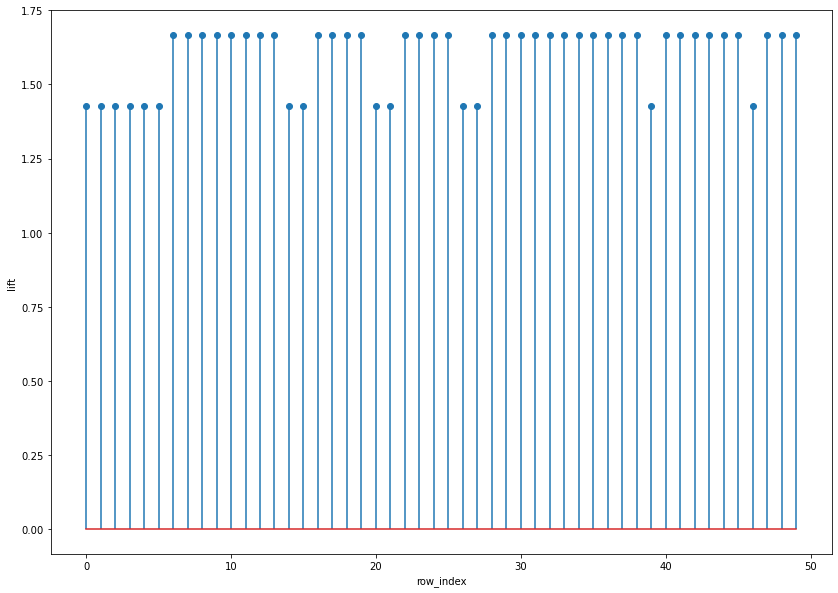

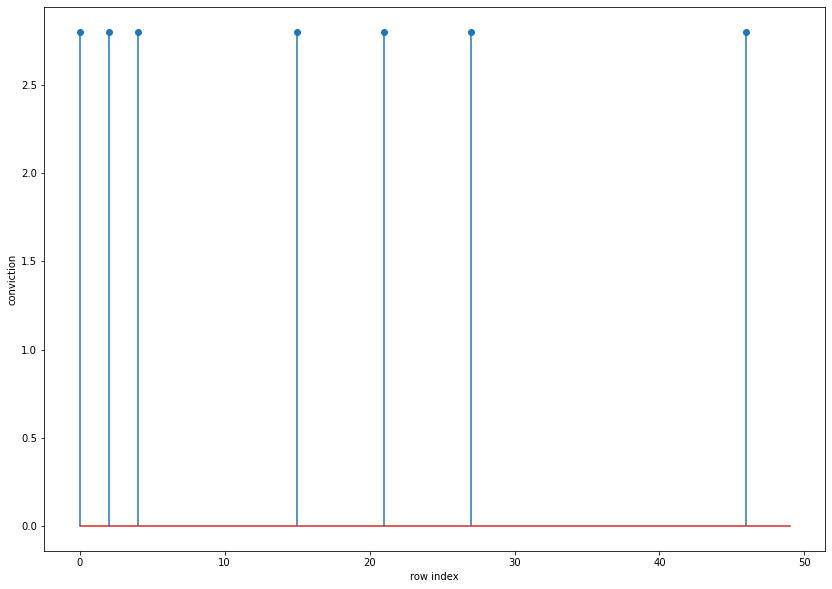

In [93]:
#here we take min_support=0.55, min_threshold=0.6

frequent_itemsets3 = apriori(data, min_support=0.55, use_colnames=True,)
frequent_itemsets3.head()

rules3= association_rules(frequent_itemsets3, metric="lift", min_threshold=0.6)

   #### plotting the lift values 

plt.figure(figsize=(14,10))
plt.ylabel("lift")
plt.xlabel("row_index")
plt.stem(np.arange(len(rules3)),np.round(rules3["lift"],4))


#### Plotting the conviction values

plt.figure(figsize=(14,10))
plt.xlabel("row index")
plt.ylabel("conviction")
plt.stem(np.arange(len(rules3)),np.round(rules3["conviction"],4))


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
#A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

rules3.sort_values('lift',ascending = False)[0:20]#Here the rules dataset sorted desceding order according to the lift values

## lift>1 means the items are dependent more. and high conviction value means that the consequent is highly depending on the anteccedent

rules3[rules3.lift>1]#here the consequent items are more dependent to the antecedent items

In [94]:
rules3


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
7,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
8,(V2_Patriot),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V2_Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
